# Sesi 11 - Regression Models

## Simple Linier Regression with scikit-learn

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:

x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38]).reshape((-1, 1))

In [3]:
print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[[ 5]
 [20]
 [14]
 [32]
 [22]
 [38]]


In [4]:
x.shape

(6, 1)

In [5]:
y.shape

(6, 1)

In [6]:
# buat model dan fit

lr = LinearRegression()

In [7]:
lr.fit(x, y)

LinearRegression()

In [8]:
lr2 = LinearRegression().fit(x,y)

In [9]:
r_sq = lr2.score(x,y)

r_sq

0.7158756137479542

In [10]:
r_sq = lr.score(x,y)

r_sq

0.7158756137479542

In [11]:
print('intercept:', lr.intercept_)
print('slope:', lr.coef_)

intercept: [5.63333333]
slope: [[0.54]]


In [12]:
new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
print('intercept:', new_model.intercept_)
print('slope:', new_model.coef_)

intercept: [5.63333333]
slope: [[0.54]]


In [13]:
y_pred = lr.predict(x)

print('predicted response:', y_pred, sep='\n')

predicted response:
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


Text(0, 0.5, 'y')

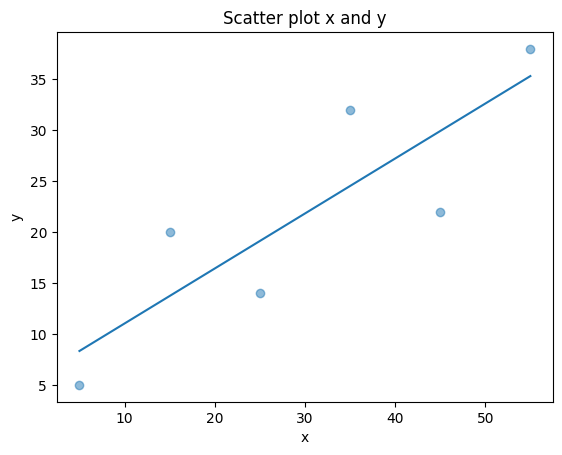

In [14]:
plt.scatter(x, y, alpha=0.5)
plt.plot(x, y_pred)

plt.title('Scatter plot x and y')
plt.xlabel('x')
plt.ylabel('y')

In [15]:
y_pred = lr.intercept_ + lr.coef_ * x
print('predicted response:', y_pred, sep='\n')

predicted response:
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


In [16]:
x_new = np.arange(5).reshape((-1, 1))
print(x_new)
y_new = lr.predict(x_new)
print(y_new)

[[0]
 [1]
 [2]
 [3]
 [4]]
[[5.63333333]
 [6.17333333]
 [6.71333333]
 [7.25333333]
 [7.79333333]]


## Multiple Linear Regression with scikit-learn

In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

In [18]:
print(x)
print(y)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]
[ 4  5 20 14 32 22 38 43]


In [19]:
mlr = lr.fit(x,y)

In [20]:
r_sq = mlr.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', mlr.intercept_)
print('slope:', mlr.coef_)

coefficient of determination: 0.8615939258756776
intercept: 5.52257927519819
slope: [0.44706965 0.25502548]


In [21]:
y_pred = mlr.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [22]:
x_new = np.arange(10).reshape((-1, 2))
print(x_new)
y_new = mlr.predict(x_new)
print(y_new)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


## Polinomial Regression with scikit-learn

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [24]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])
print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[15 11  2  8 25 32]


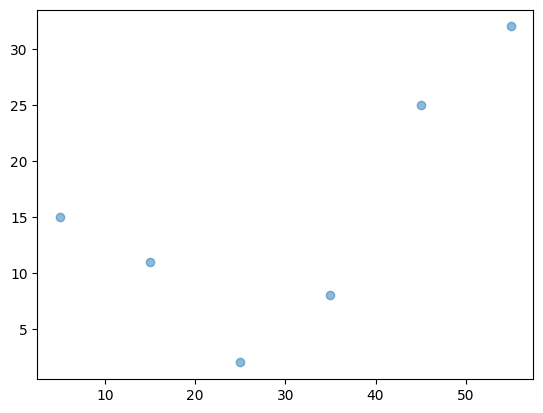

In [25]:
plt.scatter(x, y, alpha=0.5)

In [26]:
transformer = PolynomialFeatures(degree=2, include_bias=False)

In [27]:
transformer.fit(x)

PolynomialFeatures(include_bias=False)

In [28]:
PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                   order='C')

PolynomialFeatures(include_bias=False)

In [29]:
x_ = transformer.transform(x)

In [30]:
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

In [31]:
print(x_)

[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]


In [32]:
model = LinearRegression().fit(x_, y)

In [33]:
r_sq = model.score(x_, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)

coefficient of determination: 0.8908516262498564
intercept: 21.37232142857144
coefficients: [-1.32357143  0.02839286]


In [34]:
x_ = PolynomialFeatures(degree=2, include_bias=True).fit_transform(x)

In [35]:
print(x_)

[[1.000e+00 5.000e+00 2.500e+01]
 [1.000e+00 1.500e+01 2.250e+02]
 [1.000e+00 2.500e+01 6.250e+02]
 [1.000e+00 3.500e+01 1.225e+03]
 [1.000e+00 4.500e+01 2.025e+03]
 [1.000e+00 5.500e+01 3.025e+03]]


In [36]:
model = LinearRegression(fit_intercept=False).fit(x_, y)

In [37]:
r_sq = model.score(x_, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)

coefficient of determination: 0.8908516262498563
intercept: 0.0
coefficients: [21.37232143 -1.32357143  0.02839286]


In [38]:
y_pred = model.predict(x_)
print('predicted response:', y_pred, sep='\n')

predicted response:
[15.46428571  7.90714286  6.02857143  9.82857143 19.30714286 34.46428571]


## Summary

In [39]:
# Step 1: Import packages
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Step 2a: Provide data
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

# Step 2b: Transform input data
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

# Step 3: Create a model and fit it
model = LinearRegression().fit(x_, y)

# Step 4: Get results
r_sq = model.score(x_, y)
intercept, coefficients = model.intercept_, model.coef_

# Step 5: Predict
y_pred = model.predict(x_)

In [40]:
print('coefficient of determination:', r_sq)
print('intercept:', intercept)
print('coefficients:', coefficients, sep='\n')
print('predicted response:', y_pred, sep='\n')

coefficient of determination: 0.9453701449127822
intercept: 0.8430556452395876
coefficients:
[ 2.44828275  0.16160353 -0.15259677  0.47928683 -0.4641851 ]
predicted response:
[ 0.54047408 11.36340283 16.07809622 15.79139    29.73858619 23.50834636
 39.05631386 41.92339046]


## Advanced Linear Regression With statsmodels

In [41]:
import numpy as np
import statsmodels.api as sm

In [42]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)
print(x)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]


In [43]:
x = sm.add_constant(x)

In [44]:
print(x)
print(y)

[[ 1.  0.  1.]
 [ 1.  5.  1.]
 [ 1. 15.  2.]
 [ 1. 25.  5.]
 [ 1. 35. 11.]
 [ 1. 45. 15.]
 [ 1. 55. 34.]
 [ 1. 60. 35.]]
[ 4  5 20 14 32 22 38 43]


In [45]:
model = sm.OLS(y, x)

In [46]:
results = model.fit()

In [47]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Mon, 17 Apr 2023   Prob (F-statistic):            0.00713
Time:                        23:47:08   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [48]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

coefficient of determination: 0.8615939258756776
adjusted coefficient of determination: 0.8062314962259487
regression coefficients: [5.52257928 0.44706965 0.25502548]


In [49]:
print('predicted response:', results.fittedvalues, sep='\n')
print('predicted response:', results.predict(x), sep='\n')

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]
predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [50]:
x_new = sm.add_constant(np.arange(10).reshape((-1, 2)))
print(x_new)
y_new = results.predict(x_new)
print(y_new)

[[1. 0. 1.]
 [1. 2. 3.]
 [1. 4. 5.]
 [1. 6. 7.]
 [1. 8. 9.]]
[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


## Implementing Linear Regression on Real Dataset

### Using statsmodels

In [51]:
import statsmodels.api as sm
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

In [52]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [53]:
import numpy as np
import pandas as pd

# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

In [54]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [55]:
target.head()

,MEDV
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [65]:
X = df["MedInc"]
y = target["MEDV"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                          1.357e+05
Date:                Mon, 17 Apr 2023   Prob (F-statistic):                        0.00
Time:                        23:50:15   Log-Likelihood:                         -26188.
No. Observations:               20640   AIC:                                  5.238e+04
Df Residuals:                   20639   BIC:                                  5.239e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.5118      0.001    368.395      0.000       0.509       0.515
==============================================================================
Omnibus:                     3633.023   Durbin-Watson:                   0.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9249.629
Skew:                           0.974   Prob(JB):                         0.00
Kurtosis:                       5.638   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

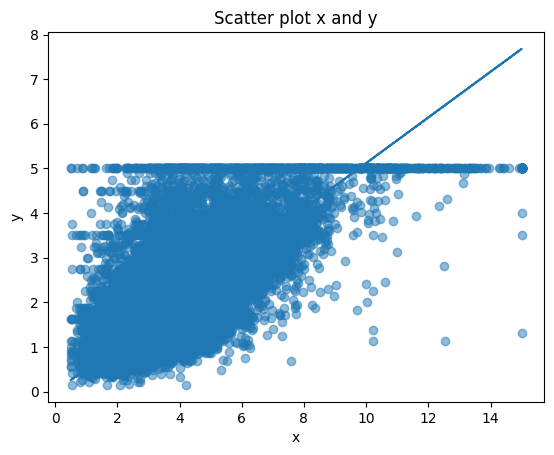

In [66]:
plt.scatter(X, y, alpha=0.5)
plt.plot(X, predictions)
plt.title('Scatter plot x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Using sklearn pt 1

In [67]:
from sklearn import linear_model

In [69]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

In [70]:
# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=['MEDV'])

In [71]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [72]:
target.head()

,MEDV
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [73]:
X = df
y = target['MEDV']

In [74]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [75]:
predictions = lm.predict(X)
print(predictions)

[4.13164983 3.97660644 3.67657094 ... 0.17125141 0.31910524 0.51580363]


In [ ]:
lm.score(X,y)

0.7406426641094094

### Using sklearn pt 2

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/CarPrice_Assignment.csv', usecols=['horsepower', 'price'])
df.head()

,horsepower,price
0,111,13495.0
1,111,16500.0
2,154,16500.0
3,102,13950.0
4,115,17450.0


In [77]:
df.shape

(205, 2)

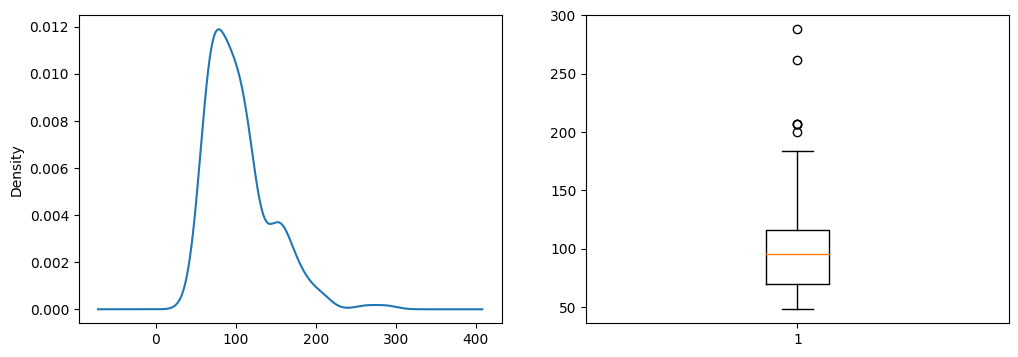

In [78]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['horsepower'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['horsepower'])
plt.show()

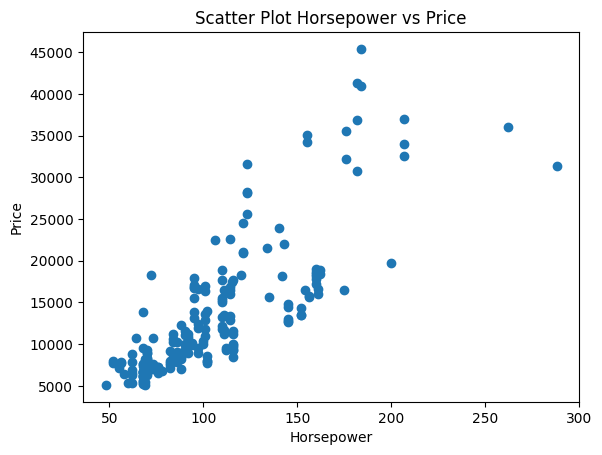

In [79]:
plt.scatter(df['horsepower'], df['price'])

plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Scatter Plot Horsepower vs Price')
plt.show()

In [80]:
df.corr()

,horsepower,price
horsepower,1.000000,0.808139
price,0.808139,1.000000


In [81]:
x = df['horsepower'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [82]:
print(x)
print(y)

[[111]
 [111]
 [154]
 [102]
 [115]
 [110]
 [110]
 [110]
 [140]
 [160]
 [101]
 [101]
 [121]
 [121]
 [121]
 [182]
 [182]
 [182]
 [ 48]
 [ 70]
 [ 70]
 [ 68]
 [ 68]
 [102]
 [ 68]
 [ 68]
 [ 68]
 [102]
 [ 88]
 [145]
 [ 58]
 [ 76]
 [ 60]
 [ 76]
 [ 76]
 [ 76]
 [ 76]
 [ 86]
 [ 86]
 [ 86]
 [ 86]
 [101]
 [100]
 [ 78]
 [ 70]
 [ 70]
 [ 90]
 [176]
 [176]
 [262]
 [ 68]
 [ 68]
 [ 68]
 [ 68]
 [ 68]
 [101]
 [101]
 [101]
 [135]
 [ 84]
 [ 84]
 [ 84]
 [ 84]
 [ 64]
 [ 84]
 [120]
 [ 72]
 [123]
 [123]
 [123]
 [123]
 [155]
 [155]
 [184]
 [184]
 [175]
 [ 68]
 [ 68]
 [ 68]
 [102]
 [116]
 [ 88]
 [145]
 [145]
 [145]
 [ 88]
 [ 88]
 [116]
 [116]
 [ 69]
 [ 55]
 [ 69]
 [ 69]
 [ 69]
 [ 69]
 [ 69]
 [ 69]
 [ 69]
 [ 69]
 [ 97]
 [ 97]
 [152]
 [152]
 [152]
 [160]
 [200]
 [160]
 [ 97]
 [ 95]
 [ 97]
 [ 95]
 [ 95]
 [ 95]
 [ 95]
 [ 95]
 [ 97]
 [ 95]
 [142]
 [ 68]
 [102]
 [ 68]
 [ 68]
 [ 68]
 [ 88]
 [145]
 [143]
 [207]
 [207]
 [207]
 [288]
 [ 90]
 [ 90]
 [110]
 [110]
 [110]
 [110]
 [160]
 [160]
 [ 69]
 [ 73]
 [ 73]
 [ 82]
 [ 82]

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [84]:
x_train.shape

(164, 1)

In [85]:
x_test.shape

(41, 1)

In [86]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [87]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[163.83429558]]
[-3557.03141342]


In [88]:
lin_reg.score(x_test, y_test)

0.6170224117990379

Text(0.5, 1.0, 'Plot Horsepower vs Price')

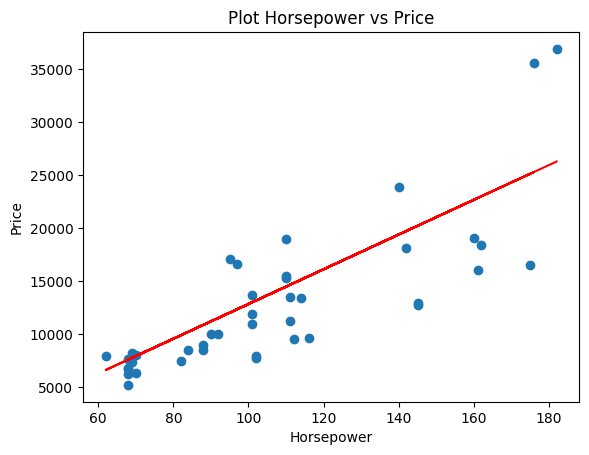

In [89]:
y_prediction = lin_reg.predict(x_test)

plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediction, c='r')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Plot Horsepower vs Price')

In [90]:
lin_reg.predict([[100]])

array([[12826.39814493]])

In [91]:
lin_reg.predict([[150]])

array([[21018.11292411]])

In [92]:
lin_reg.predict([[200]])

array([[29209.82770328]])

---